In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

!pip3 install scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### Loading the dataset

In [17]:

# Load both CSVs
features = pd.read_csv(r"C:\Users\Admin\Desktop\PLP\AI WEEK 2 ASSIGNMENT\dengue_features_train.csv")
labels = pd.read_csv(r"C:\Users\Admin\Desktop\PLP\AI WEEK 2 ASSIGNMENT\dengue_labels_train.csv")

# Merge on city, year, and weekofyear
df = pd.merge(features, labels, on=['city', 'year', 'weekofyear'])

# Now df has the 'total_cases' column!

# Preview data
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())




  city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                 

In [18]:
# Drop irrelevant or missing columns 
data = df.drop(columns=['week_start_date'])  # Optional, depending on use

# Fill missing values 
data.fillna(method='ffill', inplace=True)  # Forward fill

# Check data info
print(df.info())

# Check if 'total_cases' column exists
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

C:\Users\Admin\AppData\Local\Temp\ipykernel_7552\3576009949.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)  # Forward fill


In [19]:

df.columns

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [20]:
# Features (drop columns that are not useful for prediction)
X = df.drop(columns=['city', 'year', 'weekofyear', 'total_cases'])

# Target (what we want to predict)
y = df['total_cases']


#### Splitting into train/ Test Data

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [27]:
# Drop the non-numeric column
X = df.drop(columns=['week_start_date', 'total_cases'])  # X = features
y = df['total_cases']  # y = target



#### Train a Machine Learning Model (Random Forest)

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_train['city'] = le.fit_transform(X_train['city'])
X_test['city'] = le.transform(X_test['city'])  # If you're using test set


In [33]:
print(X_train.dtypes)



city                                      object
year                                       int64
weekofyear                                 int64
ndvi_ne                                  float64
ndvi_nw                                  float64
ndvi_se                                  float64
ndvi_sw                                  float64
precipitation_amt_mm                     float64
reanalysis_air_temp_k                    float64
reanalysis_avg_temp_k                    float64
reanalysis_dew_point_temp_k              float64
reanalysis_max_air_temp_k                float64
reanalysis_min_air_temp_k                float64
reanalysis_precip_amt_kg_per_m2          float64
reanalysis_relative_humidity_percent     float64
reanalysis_sat_precip_amt_mm             float64
reanalysis_specific_humidity_g_per_kg    float64
reanalysis_tdtr_k                        float64
station_avg_temp_c                       float64
station_diur_temp_rng_c                  float64
station_max_temp_c  

In [34]:
X = pd.get_dummies(X)  # this converts categorical columns into numeric


In [35]:
X = df.drop(columns=['total_cases'])
X = pd.get_dummies(X)

y = df['total_cases']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
print(X_train.dtypes)  # all should be int or float
print(X_train.isnull().sum())  # all should be 0



year                            int64
weekofyear                      int64
ndvi_ne                       float64
ndvi_nw                       float64
ndvi_se                       float64
                               ...   
week_start_date_2010-05-28       bool
week_start_date_2010-06-04       bool
week_start_date_2010-06-11       bool
week_start_date_2010-06-18       bool
week_start_date_2010-06-25       bool
Length: 1073, dtype: object
year                            0
weekofyear                      0
ndvi_ne                       156
ndvi_nw                        37
ndvi_se                        15
                             ... 
week_start_date_2010-05-28      0
week_start_date_2010-06-04      0
week_start_date_2010-06-11      0
week_start_date_2010-06-18      0
week_start_date_2010-06-25      0
Length: 1073, dtype: int64


In [37]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)


In [38]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [39]:
# Evaluate the model
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R² Score:", r2)


Mean Absolute Error: 14.857876712328768
R² Score: 0.6332814839787925


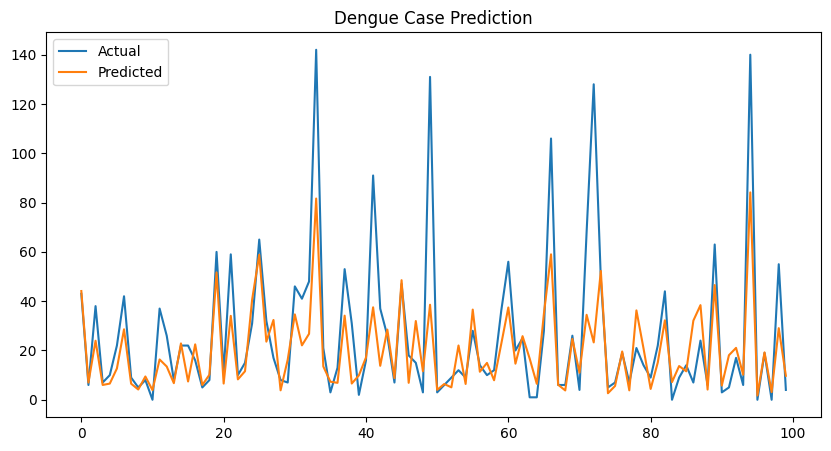

In [40]:
# visualize
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title("Dengue Case Prediction")
plt.show()
